# Life Expectancy and GDP

This portfolio project is meant to test my skills using Python's matplotlib, seaborn, and pandas libraries
for data visualization and manipulation. The goal of this project is to view the data, determine the most
appropriate visualizations, and determine what relationships or correlations we can see within and among
the data.

In [1]:
## import our modules
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
## Open the CSV and store the data
df = pd.read_csv("all_data.csv")

## View some basic info
df.info()

## view some records
df.head()

life = "Life expectancy at birth (years)"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Exploring the Data

Now that we have the data stored in a `dataframe` called `df`, we can use some basic seaborn/matplotlib
methods to view the data. What might be good is viewing a `countplot` of the number of records from each
unique country to start.

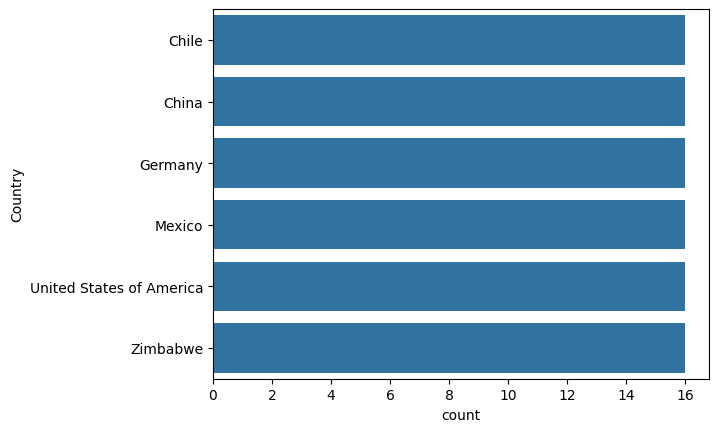

<Figure size 640x480 with 0 Axes>

In [3]:
## countplot of unique countries
sns.countplot(df["Country"])
plt.show()
plt.clf()

In the above, we can see that we have six unique countries each with 16 records, totaling our previously
shown record count of 96.

## First Visualization

The first meaningful visualization may be a line chart of year versus life-expectancy per country. Let's do
that by using subplots.

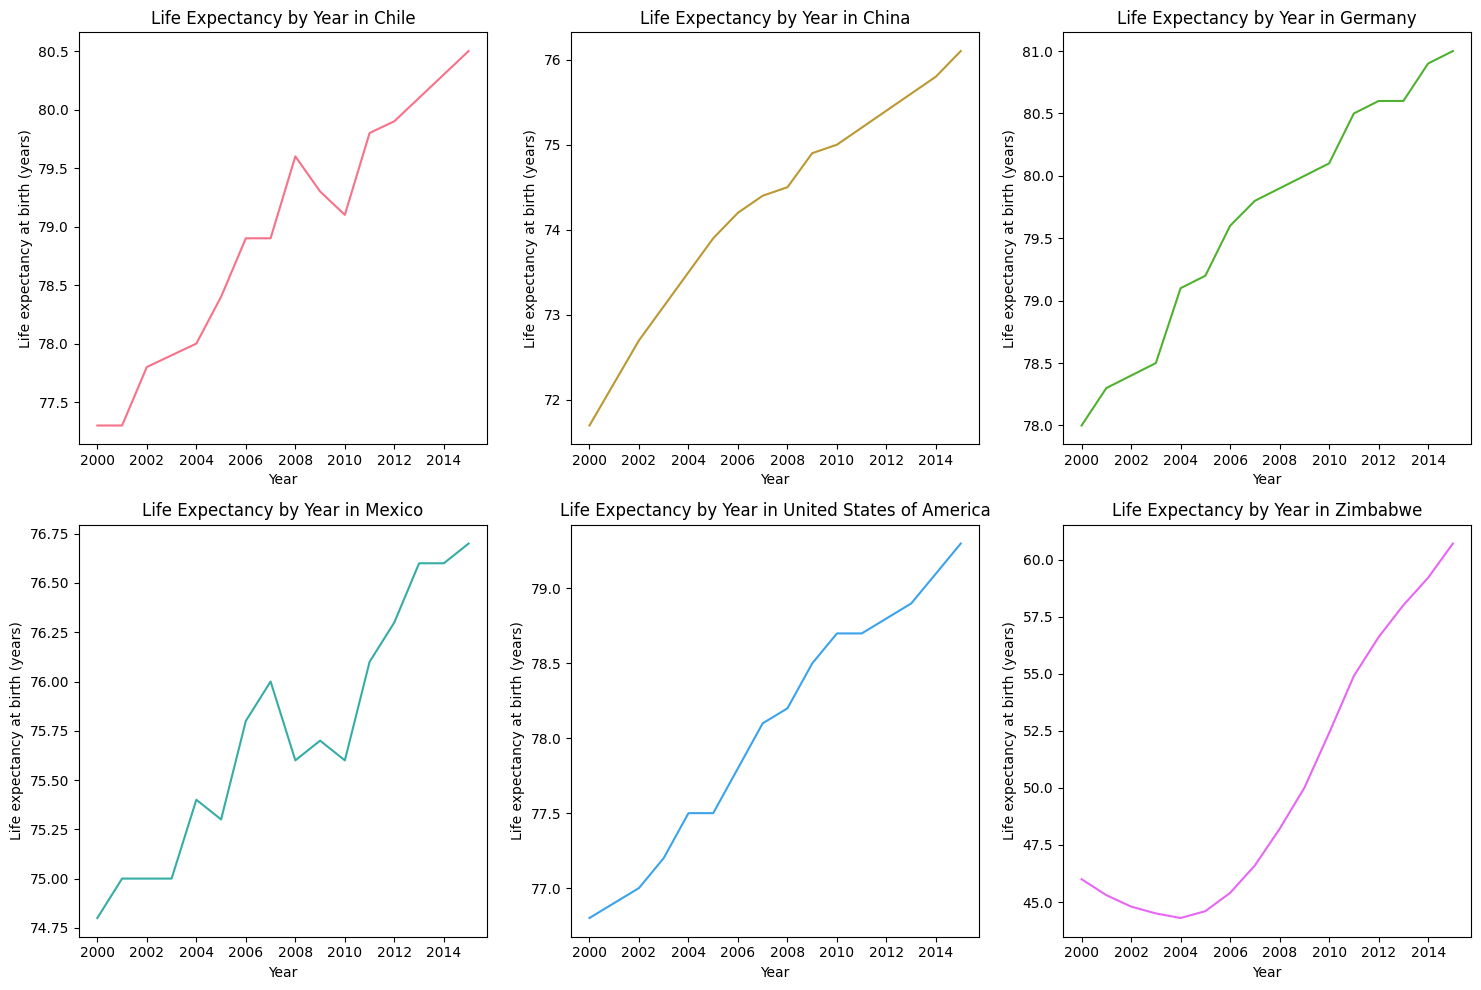

In [15]:
# Create a color palette for the number of plots you need
colors = sns.color_palette("husl", n_plots)

# Calculate number of rows and columns needed
n_plots = len(df['Country'].unique())
n_cols = math.ceil(math.sqrt(n_plots))
n_rows = math.ceil(n_plots / n_cols)

# Create figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes_flat = axes.flatten()

# Loop through data and create subplots
for i, (ax, country, color) in enumerate(zip(axes_flat, df['Country'].unique(), colors)):
    if i < n_plots:
        sub_df = df[df['Country'] == country]
        sns.lineplot(data=sub_df, x="Year", y=life, ax=ax, color=color)
        ax.set_title(f'Life Expectancy by Year in {country}')
    else:
        fig.delaxes(ax)

plt.tight_layout()
plt.show()

Now let's view the same data, but on one single chart.

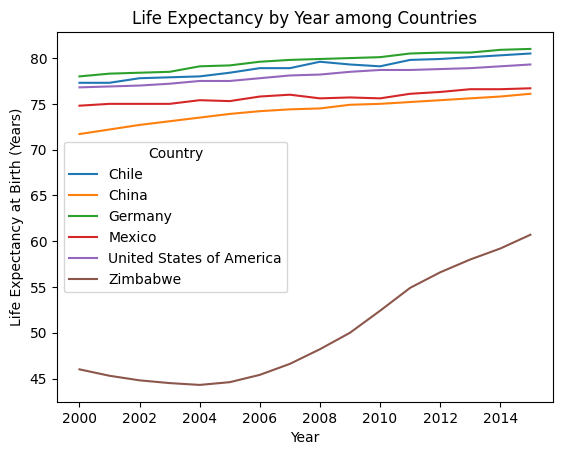

<Figure size 640x480 with 0 Axes>

In [5]:
## plot the data
sns.lineplot(x='Year', 
             y='Life expectancy at birth (years)', 
             hue='Country',
             data=df)

## labels and show
plt.title(f'Life Expectancy by Year among Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (Years)')
plt.show()
plt.clf()

## Multivariate Analysis

Now we want to visualize life expectancy in years compared to GDP.

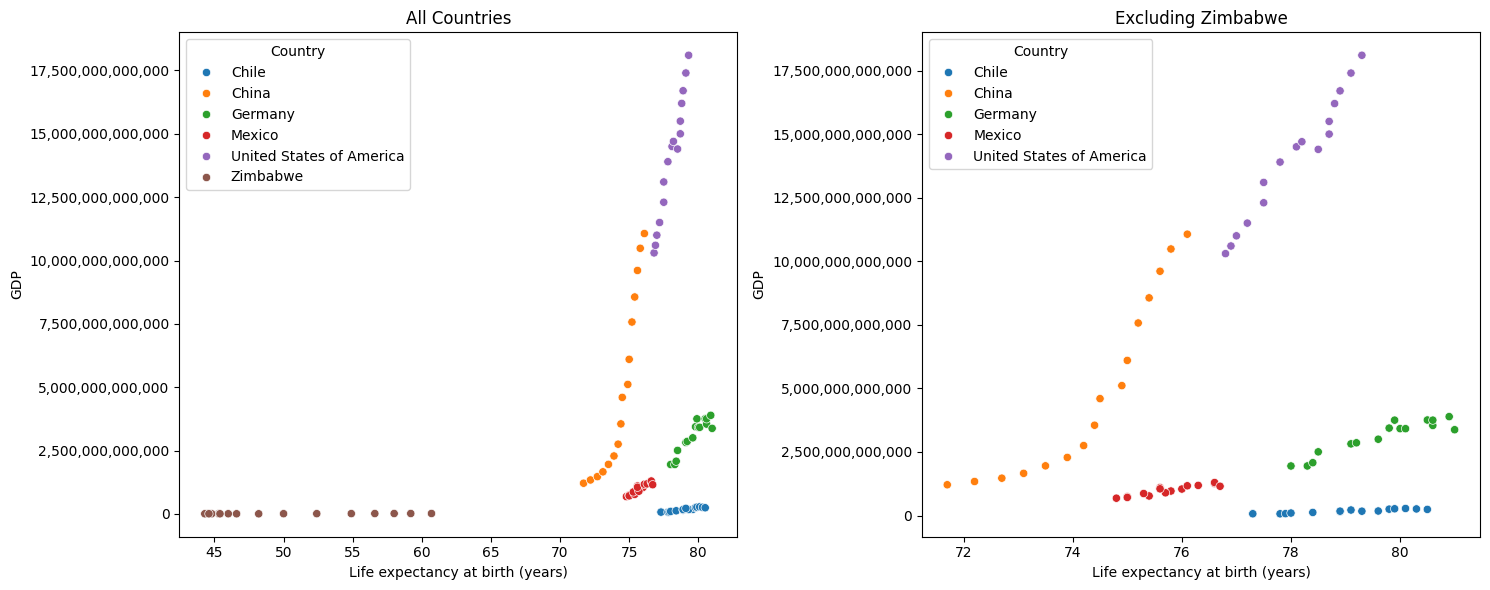

<Figure size 640x480 with 0 Axes>

In [6]:
# Create two subplots - one with and one without Zimbabwe
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Format y-axis numbers to improve readability
# Format y-axis with commas
def format_func(value, tick_number):
    return "{:,.0f}".format(value)



# Plot with all data
sns.scatterplot(data=df,
               y="GDP",
               x="Life expectancy at birth (years)",
               hue="Country",
               ax=ax1)
ax1.yaxis.set_major_formatter(FuncFormatter(format_func))
ax1.set_title("All Countries")

# Plot without Zimbabwe
sns.scatterplot(data=df[df["Country"] != "Zimbabwe"],
               y="GDP",
               x="Life expectancy at birth (years)",
               hue="Country",
               ax=ax2)
ax2.yaxis.set_major_formatter(FuncFormatter(format_func))
ax2.set_title("Excluding Zimbabwe")

plt.tight_layout()
plt.show()
plt.clf()

## Relationship of GDP and Life Expectancy

To determine a correlation between GDP and life expectancy, we can perform a correlation analysis.

In [7]:
## We need to determine if our data is normally distributed 
## before we can perform robust statistical analysis

def test_normality(data, variable_name="Variable"):
    """
    Performs multiple normality tests and prints results
    """
    # Shapiro-Wilk Test (best for n < 5000)
    shapiro_stat, shapiro_p = stats.shapiro(data)
    
    # D'Agostino-Pearson Test
    dagostino_stat, dagostino_p = stats.normaltest(data)
    
    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = stats.kstest(data, 'norm')
    
    print(f"Normality Tests for {variable_name}")
    print("-" * 50)
    print(f"Shapiro-Wilk Test:")
    print(f"Statistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")
    print(f"\nD'Agostino-Pearson Test:")
    print(f"Statistic: {dagostino_stat:.4f}, p-value: {dagostino_p:.4f}")
    print(f"\nKolmogorov-Smirnov Test:")
    print(f"Statistic: {ks_stat:.4f}, p-value: {ks_p:.4f}")

test_normality(df['GDP'], "GDP")
print(f'\n')

gdp_log = np.log(df['GDP'])

test_normality(gdp_log, "GDP")

Normality Tests for GDP
--------------------------------------------------
Shapiro-Wilk Test:
Statistic: 0.7390, p-value: 0.0000

D'Agostino-Pearson Test:
Statistic: 23.7046, p-value: 0.0000

Kolmogorov-Smirnov Test:
Statistic: 1.0000, p-value: 0.0000


Normality Tests for GDP
--------------------------------------------------
Shapiro-Wilk Test:
Statistic: 0.8992, p-value: 0.0000

D'Agostino-Pearson Test:
Statistic: 10.2242, p-value: 0.0060

Kolmogorov-Smirnov Test:
Statistic: 1.0000, p-value: 0.0000


Even post transformation of the data, we still do not have a normally
distributed set of data and our dataset is very small. Even though it
would make sense logically to suspect there is a correlation between
GDP and life expectancy.